Similar Pattern in the data using Symbolic Aggregate Approximation (SAX)

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/sujitc/Desktop/Wearables/Signatures/')
from saxpy.znorm import znorm
from saxpy.paa import paa
from saxpy.sax import ts_to_string
from saxpy.alphabet import cuts_for_asize
from sksequitur import parse
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def sax(df):
    width = 10
    max_hr = 140
    min_hr = 32
    range_hr = max_hr - min_hr
    a = range_hr/width ## number of alpabets are using 
    L = len(df)
    alist = ['a','b','c','d', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
    lookup = {}
    start = max_hr; end = min_hr
    
# ## making a linear lookup table
    for a1 in alist:
        lookup[a1] = [start, start-width]
        start -= width
#     print(lookup)
# ####build PAA following arxiv paper
    paa_arxiv = []
    for i in range(0,L-1,10):    ## this for loop will slow the code !!
        f = df.iloc[i]['heartrate']
        s = df.iloc[i+1]['heartrate']
        paa_arxiv.append((f+s)*0.5)
#     print(paa_arxiv)
# now convert to letters
    S = ''
    for p in paa_arxiv: 
        for k,v in lookup.items():
            start = v[0]
            end = v[1];
            if p <= start and p > end:
                S+= k
                break
    return S

In [4]:
dates = [ '2022-01-03','2022-01-06', '2022-01-08', '2022-01-12', '2022-01-15', '2022-01-19', '2022-01-22']

In [5]:
pat = []
for i in dates:
    df = pd.read_csv('V1_hr.csv')
    df = df.set_index(['datetime'])
    df = df[np.logical_and(df.index>= f'{str(i)} 00:00:00', df.index<= f'{str(i)} 23:59:00')]
    pat.append(sax(df))

In [6]:
pat

['feeeefffffffggggggggggghhhhghgghhhhhhhhhhhhghhhdfefgeffggffggggggeggggggggeffeffffgfeeefffffffeffffhffeefffffffefeeeefeffffffffffffffffffffghggh',
 'fffffffgggghhhghhhggggggggghghfgggggghhhhhggghhhggdfggggfffcdffffffeefffeefgeecdedeeeeeeefefegedeefeefeffbefdfffffeeffffffffeeffffffeffffggggggg',
 'fffffffgffgfgggfggghgghhhghhhhhhghhhhhiiihhhihhhhhhghhhihhgefdfeddcdddddcdceeeffeddeeddddgddeffeedccddedddddefffffggeefeffgffecdfefffffffffgfggf',
 'ffeeeefeffffffggggghhgggghgggggghhffghhhhhhfhhgfggggefhggggfggfeggggggfefffgfgggfeeggggfffgfffgffgffefffghgggffedefdffefefffffgfffffgfefefffffff',
 'eeeeffeeffeeefeffefffgffffffffffgggfgfgggggggggggfghgfefgfffffcfffeeefdddddddeedfefffffffffffeeeefcffffeddeeffffigfffeghffffgffffffgggggffffgggg',
 'bbbabbbbaabbbbbcbbcbcbcfcccccccccddcddddddefeedfeffdcdcbcedcdddeeedeeddeeeeccedcddddcccdddccddffeegegfjhefgbdeecfedeecddekhddededdeeeedeeddedeee',
 'ffgfffefffffgggggggggggggeggggggghggggfhhhhhhhhhhhhhhhhhdfegffgfggfgcedeeffgffgdeefffgggggghggggfffggffg

In [7]:
pat
for i, a in enumerate(pat):
    print(i,a)
# pat.pop(18)

0 feeeefffffffggggggggggghhhhghgghhhhhhhhhhhhghhhdfefgeffggffggggggeggggggggeffeffffgfeeefffffffeffffhffeefffffffefeeeefeffffffffffffffffffffghggh
1 fffffffgggghhhghhhggggggggghghfgggggghhhhhggghhhggdfggggfffcdffffffeefffeefgeecdedeeeeeeefefegedeefeefeffbefdfffffeeffffffffeeffffffeffffggggggg
2 fffffffgffgfgggfggghgghhhghhhhhhghhhhhiiihhhihhhhhhghhhihhgefdfeddcdddddcdceeeffeddeeddddgddeffeedccddedddddefffffggeefeffgffecdfefffffffffgfggf
3 ffeeeefeffffffggggghhgggghgggggghhffghhhhhhfhhgfggggefhggggfggfeggggggfefffgfgggfeeggggfffgfffgffgffefffghgggffedefdffefefffffgfffffgfefefffffff
4 eeeeffeeffeeefeffefffgffffffffffgggfgfgggggggggggfghgfefgfffffcfffeeefdddddddeedfefffffffffffeeeefcffffeddeeffffigfffeghffffgffffffgggggffffgggg
5 bbbabbbbaabbbbbcbbcbcbcfcccccccccddcddddddefeedfeffdcdcbcedcdddeeedeeddeeeeccedcddddcccdddccddffeegegfjhefgbdeecfedeecddekhddededdeeeedeeddedeee
6 ffgfffefffffgggggggggggggeggggggghggggfhhhhhhhhhhhhhhhhhdfegffgfggfgcedeeffgffgdeefffgggggghggggfffggffgggggggfgfggg

In [10]:
#for transition frequency
lst = []
for i in pat:
    lst.append(list(i))
b = np.array(lst)

b.shape

(7, 144)

In [11]:
df = pd.DataFrame(b)
df.to_csv('data.csv')

In [12]:
b = []
for i in range(0, 7):
    count = 0
    a =[]
    for j in range(0, 143):
        if df.iloc[i,j] != df.iloc[i,j+1]:
            count +=1
            t = df.iloc[i,j] + '>'+ df.iloc[i,j+1] 
            a.append(t)
    b.append(a)
    print(count)

46
57
69
67
55
83
49


In [13]:
df2 = []
for i in b:
    df1 = pd.DataFrame({'transition':i})
    df2.append(df1.value_counts())


In [17]:
for i in df2:   
    df3 = pd.DataFrame(df2[0])
    df3.reset_index(inplace=True)
    df3.rename(columns = {0: 'frequency'}, inplace =True)
    

In [19]:
df3

,transition,frequency
0,e>f,11
1,f>e,9
2,f>g,6
3,g>h,6
4,h>g,4
5,g>e,3
6,g>f,2
7,d>f,1
8,e>g,1
9,f>h,1


/Users/sujitc/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


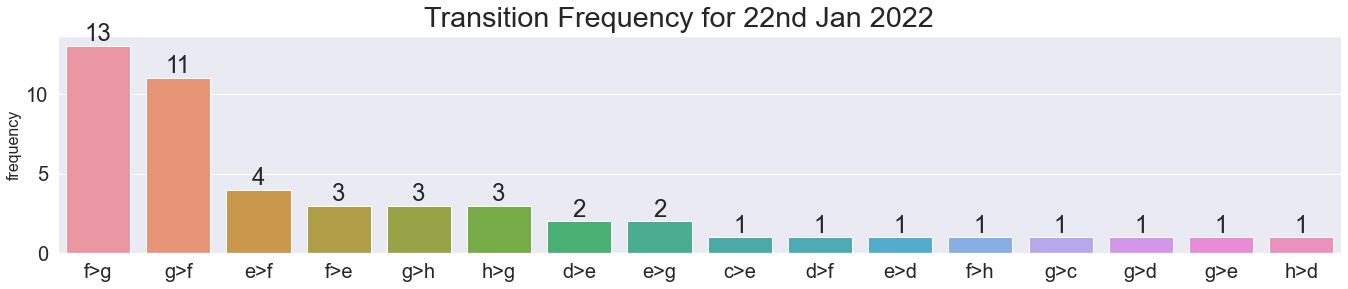

In [311]:
#Transition frequency plot
ax = sns.barplot(df3.index, df3.frequency)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.rcParams['figure.figsize'] = [23, 4]
a = df3.index
x = df3.transition
plt.xticks(a, x, fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('frequency',fontsize=16)
sns.set(font_scale=2)
plt.suptitle('Transition Frequency for 22nd Jan 2022')
# plt.ylim (0, 20)
plt.show()

In [20]:
#for symbol frequency
lst = []
for i in pat:
    lst.append(list(i))
b = np.array(lst)

b.shape

(7, 144)

In [21]:
df = pd.DataFrame(b)
df

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,f,e,e,e,e,f,f,f,f,f,...,f,f,f,f,f,g,h,g,g,h
1,f,f,f,f,f,f,f,g,g,g,...,f,f,f,g,g,g,g,g,g,g
2,f,f,f,f,f,f,f,g,f,f,...,f,f,f,f,f,g,f,g,g,f
3,f,f,e,e,e,e,f,e,f,f,...,e,f,e,f,f,f,f,f,f,f
4,e,e,e,e,f,f,e,e,f,f,...,g,g,f,f,f,f,g,g,g,g
5,b,b,b,a,b,b,b,b,a,a,...,d,e,e,d,d,e,d,e,e,e
6,f,f,g,f,f,f,e,f,f,f,...,g,g,g,g,g,g,g,g,g,g


In [22]:
#get the list of symbols and the maximum frequency overall
alpha = []
val = []

for i in df:
    alpha.append(df.iloc[:, i].value_counts().keys()[0])
    val.append(df.iloc[:, i].value_counts().max())

In [171]:
freq = pd.DataFrame({'symbol':alpha,'frequency':val})
# freq.to_clipboard()
# freq.sort_values(by= 'frequency', ascending = False)
freq[freq['frequency']==20].count()   
freq

,symbol,frequency
0,f,5
1,f,4
2,e,3
3,e,3
4,f,4
...,...,...
139,g,4
140,g,3
141,g,5
142,g,5


/Users/sujitc/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


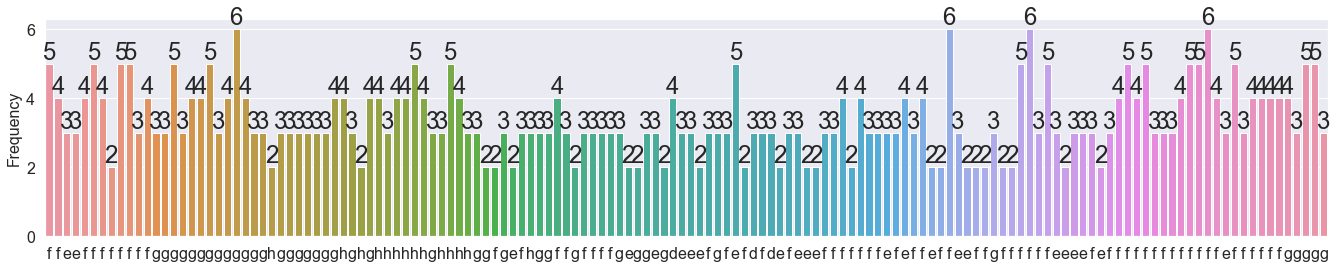

In [174]:
## Symbol Frequency Plot
ax = sns.barplot(freq.index, freq.frequency)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.rcParams['figure.figsize'] = [23, 4]
a = freq.index
x = freq.symbol
plt.xticks(a, x, fontsize = 16)
plt.yticks(fontsize = 16)
sns.set(font_scale=2)
plt.ylabel('Frequency',fontsize=16)
# plt.ylim (0, 20)
plt.show()